<img src="images/utfsm.png" alt="" width="200px" align="right"/>

# USM Numérica
## Tema del Notebook
### Objetivos
1. Conocer el funcionamiento de la librerìa sklearn de Machine Learning
2. Aplicar la librerìa sklearn para solucionar problemas de Machine Learning

## Sobre el autor
### Sebastián Flores
#### ICM UTFSM
#### sebastian.flores@usm.cl

## Sobre la presentación
#### Contenido creada en ipython notebook (jupyter)
#### Versión en Slides gracias a RISE de Damián Avila
Software:
* python 2.7 o python 3.1
* pandas 0.16.1
* sklearn 0.16.1

Opcional:
* numpy 1.9.2
* matplotlib 1.3.1

In [1]:
from sklearn import __version__ as vsn
print(vsn)

0.24.1


## 0.1 Instrucciones
Las instrucciones de instalación y uso de un ipython notebook se encuentran en el siguiente [link](link).

Después de descargar y abrir el presente notebook, recuerden:
* Desarrollar los problemas de manera secuencial.
* Guardar constantemente con *`Ctr-S`* para evitar sorpresas.
* Reemplazar en las celdas de código donde diga *`FIX_ME`* por el código correspondiente.
* Ejecutar cada celda de código utilizando *`Ctr-Enter`*

## 0.2 Licenciamiento y Configuración
Ejecutar la siguiente celda mediante *`Ctr-Enter`*.

In [5]:
"""
IPython Notebook v4.0 para python 3.0
Librerías adicionales: numpy, scipy, matplotlib. (EDITAR EN FUNCION DEL NOTEBOOK!!!)
Contenido bajo licencia CC-BY 4.0. Código bajo licencia MIT. 
(c) Sebastian Flores, Christopher Cooper, Alberto Rubio, Pablo Bunout.
"""
# Configuración para recargar módulos y librerías dinámicamente
%reload_ext autoreload
%autoreload 2

# Configuración para graficos en línea
%matplotlib inline

## 1.- Sobre la librería sklearn
#### Historia
- Nace en 2007, como un Google Summer Project de David Cournapeau. 
- Retomado por Matthieu Brucher para su proyecto de tesis.
- Desde 2010 con soporte por parte de INRIA.
- Actualmente +35 colaboradores.

## 1.- Sobre la librería sklearn
#### Instalación
En python, con un poco de suerte:
```
pip install -U scikit-learn
```

Utilizando Anaconda:

```
conda install scikit-learn
```

## 1.- Sobre la librería sklearn
#### ¿Porqué sklearn?
sklearn viene de scientific toolbox for Machine Learning. 

scikit learn para los amigos.

Existen múltiples scikits, que son "scientific toolboxes" construidos sobre SciPy: [https://scikits.appspot.com/scikits](https://scikits.appspot.com/scikits).

Primero que nada... ¿Qué es Machine Learning?

## 2.- Machine Learning 101
#### Ejemplo

Consideremos un dataset consistente en características de diversos animales.

```
patas,   ancho,   largo,   alto,    peso,        especie
[numero],[metros],[metros],[metros],[kilogramos],[]
2,       0.6,     0.4,     1.7,     75,          humano
2,       0.6,     0.4,     1.8,     90,          humano
...
2,       0.5,     0.5,     1.7,     85,          humano
4,       0.2,     0.5,     0,3,     30,          gato
...
4,       0.25,    0.55,    0.32,    32,          gato
4,       0.5,     0.8,     0.3,     50,          perro
...
4,       0.4,     0.4,     0.32,    40,          perro
```

## 2.- Machine Learning 101
### Clustering

Supongamos que no nos han dicho la especie de cada animal. 

¿Podríamos reconocer las distintas especies? 

¿Podríamos reconocer que existen 3 grupos distintos de animales?

## 2.- Machine Learning 101
### Clasificación

Supongamos que conocemos los datos de cada animal y además la especie.

Si alguien llega con las medidas de un animal... ¿podemos decir cuál será la especie?

## 2.- Machine Learning 101
### Regresión

Supongamos que conocemos los datos de cada animal y su especie. 

Si alguien llega con los datos de un animal, excepto el peso... ¿podemos predecir el peso que tendrá el animal?

## 2.- Machine Learning 101
### Definiciones

* Los datos utilizados para predecir son predictores (features), y típicamente se llama `X`.
* El dato que se busca predecir se llama etiqueta (label) y puede ser numérica o categórica, y típicamente se llama `y`.

## 3- Generalidades de sklearn
### Imagen resumen

<img src="images/ml_map.png" alt="" width="1400px" align="middle"/>

## 3- Generalidades de sklearn
### Procedimiento General

In [3]:
from sklearn import HelpfulMethods
from sklearn import AlgorithmIWantToUse

# split data into train and test datasets

# train model with train dataset

# compute error on test dataset

# Optional: Train model with all available data

# Use model for some  prediction


ImportError: cannot import name 'HelpfulMethods' from 'sklearn' (/miniconda3/envs/meetup/lib/python3.9/site-packages/sklearn/__init__.py)

## 4- Clustering con sklearn
#### Wine Dataset

Los datos del [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/Wine) son un conjunto de datos clásicos para verificar los algoritmos de clustering. 

<img src="images/wine.jpg" alt="" width="600px" align="middle"/>

Los datos corresponden a 3 cultivos diferentes de vinos de la misma región de Italia, y que han sido identificados con las etiquetas 1, 2 y 3.

## 4- Clustering con sklearn
#### Wine Dataset

Para cada tipo de vino se realizado 13 análisis químicos:

1. Alcohol 
2.  Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 


La base de datos contiene 178 muestras distintas en total.

In [6]:
%%bash
head data/wine_data.csv

class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280-OD315_of_diluted_wines,proline    
1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735
1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.6,2.51,.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14,97,2.8,2.98,.29,1.98,5.2,1.08,2.85,1045


## 4- Clustering con sklearn
#### Lectura de datos

In [7]:
import pandas as pd
data = pd.read_csv("data/wine_data.csv")

In [8]:
data

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280-OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## 4- Clustering con sklearn
#### Exploración de datos

In [9]:
data.columns

Index(['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280-OD315_of_diluted_wines', 'proline    '],
      dtype='object')

In [10]:
data["class"].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [11]:
data.describe(include="all")

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280-OD315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 4- Clustering con sklearn
#### Exploración gráfica de datos

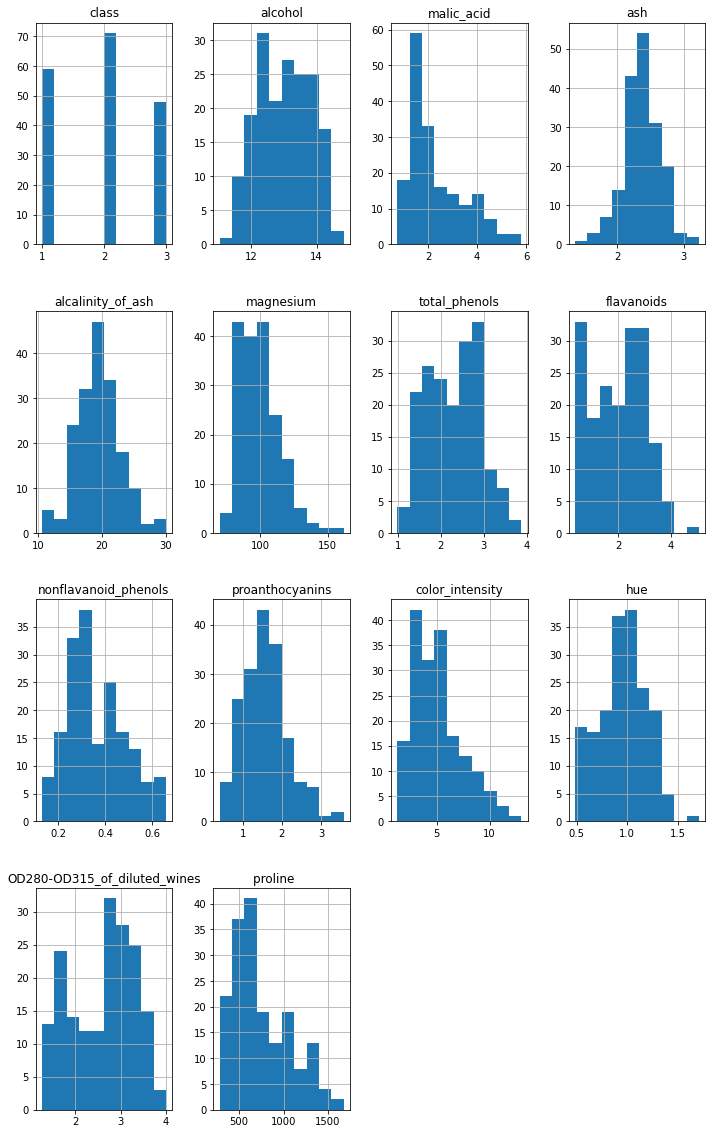

In [12]:
from matplotlib import pyplot as plt
data.hist(figsize=(12,20))
plt.show()

In [13]:
from matplotlib import pyplot as plt
#pd.scatter_matrix(data, figsize=(12,12), range_padding=0.2)
#plt.show()

## 4- Clustering con sklearn
#### Separación de los datos
Necesitamos separar los datos en los predictores (features) y las etiquetas (labels)

In [14]:
X = data.drop("class", axis=1)
true_labels = data["class"] -1 # labels deben ser 0, 1, 2, ..., n-1

## 4- Custering
#### Magnitudes de los datos

In [15]:
print(X.mean())

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
OD280-OD315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64


In [16]:
print(X.std())

alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensity                   2.318286
hue                               0.228572
OD280-OD315_of_diluted_wines      0.709990
proline                         314.907474
dtype: float64


## 4- Clustering con sklearn
#### Algoritmo de Clustering
Para Clustering usaremos el algoritmo KMeans. 

Apliquemos un algoritmo de clustering directamente

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Parameters
n_clusters = 3

# Running the algorithm
kmeans = KMeans(n_clusters)
kmeans.fit(X)
pred_labels = kmeans.labels_

cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[ 0 46 13]
 [50  1 20]
 [19  0 29]]


## 4- Clustering con sklearn
#### Normalizacion de datos
Resulta conveniente escalar los datos, para que el algoritmo de clustering funcione mejor

In [18]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

In [19]:
print(X_scaled.mean())

-1.2282501914608474e-16


In [20]:
print(X_scaled.std())

1.0


## 4- Clustering con sklearn
#### Algoritmo de Clustering
Ahora podemos aplicar un algoritmo de clustering

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Parameters
n_clusters = 3

# Running the algorithm
kmeans = KMeans(n_clusters)
kmeans.fit(X_scaled)
pred_labels = kmeans.labels_

cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[ 0 59  0]
 [ 3  3 65]
 [48  0  0]]


## 4- Clustering con sklearn
#### Regla del codo
En todos los casos hemos utilizado que el número de clusters es igual a 3. En caso que no conociéramos este dato, deberíamos graficar la suma de las distancias a los clusters para cada punto, en función del número de clusters.

In [22]:
from sklearn.cluster import KMeans

clusters = range(2,20)
total_distance = []
for n_clusters in clusters:
    kmeans = KMeans(n_clusters)
    kmeans.fit(X_scaled)
    pred_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    # Get the distances
    distance_for_n = 0
    for k in range(n_clusters):
        points = X_scaled[pred_labels==k]
        aux = (points - centroids[k,:])**2
        distance_for_n += (aux.sum(axis=1)**0.5).sum()
    total_distance.append(distance_for_n)

## 4- Clustering con sklearn
Graficando lo anterior, obtenemos

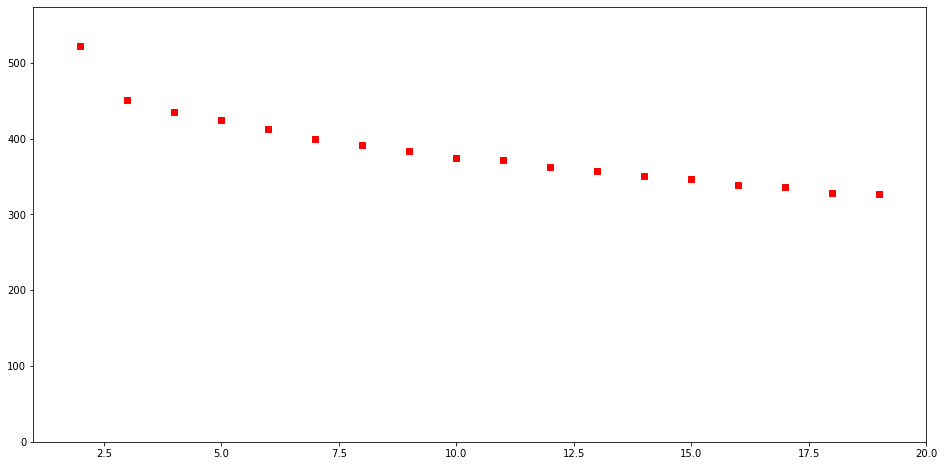

In [23]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16,8))
plt.plot(clusters, total_distance, 'rs')
plt.xlim(min(clusters)-1, max(clusters)+1)
plt.ylim(0, max(total_distance)*1.1)
plt.show()

## 4- Clustering con sklearn
¿Qué tan dificil es usar otro algoritmo de clustering?

Nada dificil.

Algoritmos disponibles:
* K-Means
* Mini-batch K-means
* Affinity propagation
* Mean-shift
* Spectral clustering
* Ward hierarchical clustering
* Agglomerative clustering
* DBSCAN
* Gaussian mixtures
* Birch

Lista con detalles: [http://scikit-learn.org/stable/modules/clustering.html](http://scikit-learn.org/stable/modules/clustering.html)

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Normalization of data
X_scaled = preprocessing.scale(X)

# Running the algorithm
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
pred_labels = kmeans.labels_

# Evaluating the output
cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[ 0 59  0]
 [ 3  3 65]
 [48  0  0]]


In [25]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Normalization of data
X_scaled = preprocessing.scale(X)

# Running the algorithm
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(X_scaled)
pred_labels = kmeans.labels_

# Evaluating the output
cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[ 0  0 59]
 [ 2 65  4]
 [48  0  0]]


In [26]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Normalization of data
X_scaled = preprocessing.scale(X)

# Running the algorithm
kmeans = AffinityPropagation(preference=-300)
kmeans.fit(X_scaled)
pred_labels = kmeans.labels_

# Evaluating the output
cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[49 10  0]
 [ 3 58 10]
 [ 2  0 46]]


/miniconda3/envs/meetup/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


## 5- Clasificación
#### Reconocimiento de dígitos
Los datos se encuentran en 2 archivos, `data/optdigits.train` y `data/optdigits.test`. 

Como su nombre lo indica, el set `data/optdigits.train` contiene los ejemplos que deben ser usados para entrenar el modelo, mientras que el set `data/optdigits.test` se utilizará para obtener una estimación del error de predicción.

Ambos archivos comparten el mismo formato: cada línea contiene 65 valores. Los 64 primeros corresponden a la representación de la imagen en escala de grises (0-blanco, 255-negro), y el valor 65 corresponde al dígito de la imágen (0-9).

## 5- Clasificación
#### Cargando los datos

Para cargar los datos, utilizamos np.loadtxt con los parámetros extra delimiter (para indicar que el separador será en esta ocasión una coma) y con el dype np.int8 (para que su representación en memoria sea la mínima posible, 8 bits en vez de 32/64 bits para un float).

In [27]:
import numpy as np

XY_tv = np.loadtxt("data/optdigits.train", delimiter=",", dtype=np.int8)
print(XY_tv)
X_tv = XY_tv[:,:64]
Y_tv = XY_tv[:, 64]

print(X_tv.shape)
print(Y_tv.shape)
print(X_tv[0,:])
print(X_tv[0,:].reshape(8,8))
print(Y_tv[0])

[[ 0  1  6 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 [ 0  0  8 ...  0  0  7]
 ...
 [ 0  0  3 ...  0  0  6]
 [ 0  0  6 ...  5  0  6]
 [ 0  0  2 ...  0  0  7]]
(3823, 64)
(3823,)
[ 0  1  6 15 12  1  0  0  0  7 16  6  6 10  0  0  0  8 16  2  0 11  2  0
  0  5 16  3  0  5  7  0  0  7 13  3  0  8  7  0  0  4 12  0  1 13  5  0
  0  0 14  9 15  9  0  0  0  0  6 14  7  1  0  0]
[[ 0  1  6 15 12  1  0  0]
 [ 0  7 16  6  6 10  0  0]
 [ 0  8 16  2  0 11  2  0]
 [ 0  5 16  3  0  5  7  0]
 [ 0  7 13  3  0  8  7  0]
 [ 0  4 12  0  1 13  5  0]
 [ 0  0 14  9 15  9  0  0]
 [ 0  0  6 14  7  1  0  0]]
0


## 5- Clasificación
#### Visualizando los datos

Para visualizar los datos utilizaremos el método imshow de pyplot. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método text. Realizaremos lo anterior para los primeros 25 datos del archivo.

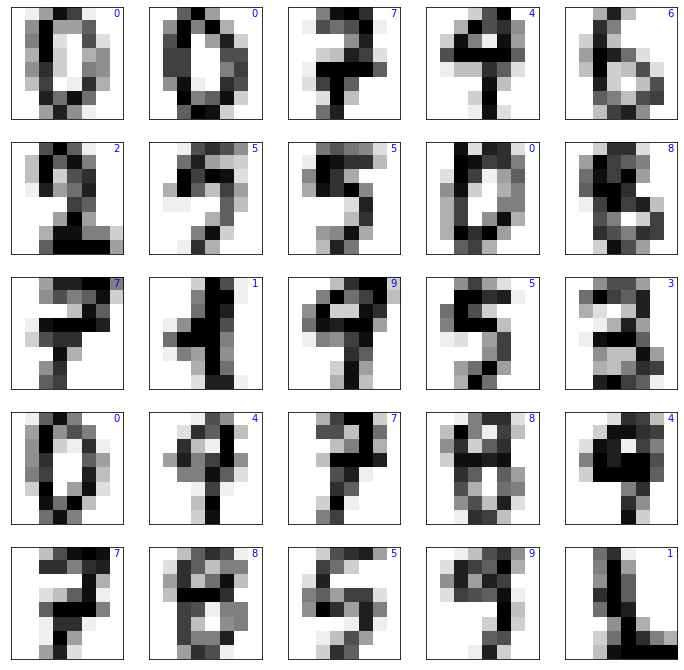

In [28]:
from matplotlib import pyplot as plt

# Well plot the first nx*ny examples
nx, ny = 5, 5
fig, ax = plt.subplots(nx, ny, figsize=(12,12))
for i in range(nx):
    for j in range(ny):
        index = j+ny*i
        data  = X_tv[index,:].reshape(8,8)
        label = Y_tv[index]
        ax[i][j].imshow(data, interpolation='nearest', cmap=plt.get_cmap('gray_r'))
        ax[i][j].text(7, 0, str(int(label)), horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='blue')
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)
plt.show()

## 5- Clasificación
#### Entrenamiento trivial
Para clasificar utilizaremos el algoritmo K Nearest Neighbours.

Entrenaremos el modelo con 1 vecino y verificaremos el error de predicción en el set de entrenamiento.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

k = 1
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(X_tv, Y_tv)
Y_pred = kNN.predict(X_tv)
n_errors = sum(Y_pred!=Y_tv)
print("Hay %d errores de un total de %d ejemplos de entrenamiento" %(n_errors, len(Y_tv)))

Hay 0 errores de un total de 3823 ejemplos de entrenamiento


¡La mejor predicción del punto es el mismo punto! 

Pero esto generalizaría catastróficamente.

Es importantísimo **entrenar** en un set de datos y luego probar como generaliza/funciona en un set **completamente nuevo**.

## 5- Clasificación
#### Seleccionando el número adecuado de vecinos

Buscando el valor de k más apropiado

A partir del análisis del punto anterior, nos damos cuenta de la necesidad de:
1. Calcular el error en un set distinto al utilizado para entrenar.
2. Calcular el mejor valor de vecinos para el algoritmo.

(Esto tomará un tiempo)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

template = "k={0:,d}: {1:.1f} +- {2:.1f} errores de clasificación de un total de {3:,d} puntos"
# Fitting the model
mean_error_for_k = []
std_error_for_k = []
k_range = range(1,8)
for k in k_range:
    errors_k = []
    for i in range(10):
        kNN = KNeighborsClassifier(n_neighbors=k)
        X_train, X_valid, Y_train, Y_valid = train_test_split(X_tv, Y_tv, train_size=0.75)
        kNN.fit(X_train, Y_train)
        # Predicting values
        Y_valid_pred = kNN.predict(X_valid)
        # Count the errors
        n_errors = sum(Y_valid!=Y_valid_pred)
        # Add them to vector
        errors_k.append(100.*n_errors/len(Y_valid))

    errors = np.array(errors_k)
    print(template.format(k, errors.mean(), errors.std(), len(Y_valid)))
    mean_error_for_k.append(errors.mean())
    std_error_for_k.append(errors.std())

k=1: 1.6 +- 0.3 errores de clasificación de un total de 956 puntos
k=2: 2.3 +- 0.5 errores de clasificación de un total de 956 puntos
k=3: 1.6 +- 0.3 errores de clasificación de un total de 956 puntos
k=4: 2.0 +- 0.4 errores de clasificación de un total de 956 puntos
k=5: 1.7 +- 0.2 errores de clasificación de un total de 956 puntos
k=6: 1.8 +- 0.3 errores de clasificación de un total de 956 puntos
k=7: 1.7 +- 0.4 errores de clasificación de un total de 956 puntos


## 5- Clasificación
Podemos visualizar los datos anteriores utilizando el siguiente código, que requiere que `sd_error_for k` y `mean_error_for_k` hayan sido apropiadamente definidos.

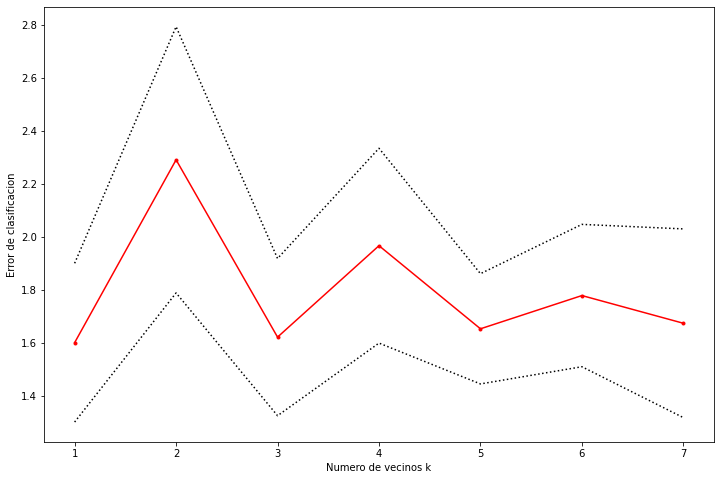

In [32]:
mean = np.array(mean_error_for_k)
std = np.array(std_error_for_k)
plt.figure(figsize=(12,8))
plt.plot(k_range, mean - std, "k:")
plt.plot(k_range, mean , "r.-")
plt.plot(k_range, mean + std, "k:")
plt.xlabel("Numero de vecinos k")
plt.ylabel("Error de clasificacion")
plt.show()

## 5- Clasificación
#### Entrenando todo el modelo
A partir de lo anterior, se fija el número de vecinos $k=3$ y se procede a entrenar el modelo con todos los datos. 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

k = 3
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(X_tv, Y_tv)

KNeighborsClassifier(n_neighbors=3)

## 5- Clasificación
#### Predicción en testing dataset

Ahora que el modelo kNN ha sido completamente entrenado, calcularemos el error de predicción en un set de datos completamente nuevo: el set de testing. 

In [35]:
# Cargando el archivo data/optdigits.tes
XY_test = np.loadtxt("data/optdigits.test", delimiter=",")
X_test = XY_test[:,:64]
Y_test = XY_test[:, 64]
# Predicción de etiquetas
Y_pred = kNN.predict(X_test)

## 5- Clasificación
Puesto que tenemos las etiquetas verdaderas en el set de entrenamiento, podemos visualizar que números han sido correctamente etiquetados.

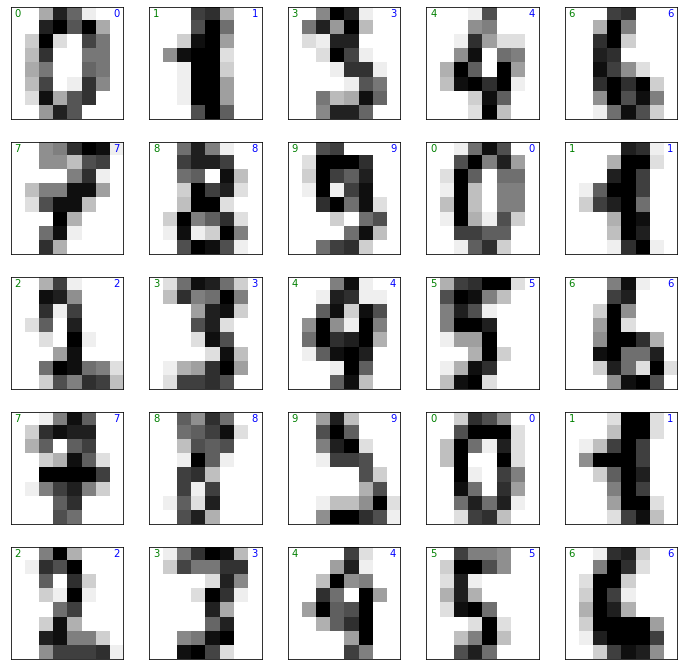

In [36]:
from matplotlib import pyplot as plt

# Mostrar los datos correctos
mask = (Y_pred==Y_test)
X_aux = X_test[mask]
Y_aux_true = Y_test[mask]
Y_aux_pred = Y_pred[mask]

# We'll plot the first 100 examples, randomly choosen
nx, ny = 5, 5
fig, ax = plt.subplots(nx, ny, figsize=(12,12))
for i in range(nx):
    for j in range(ny):
        index = j+ny*i
        data  = X_aux[index,:].reshape(8,8)
        label_pred = str(int(Y_aux_pred[index]))
        label_true = str(int(Y_aux_true[index]))
        ax[i][j].imshow(data, interpolation='nearest', cmap=plt.get_cmap('gray_r'))
        ax[i][j].text(0, 0, label_pred, horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='green')
        ax[i][j].text(7, 0, label_true, horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='blue')
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)
plt.show()

## 5- Clasificación
#### Visualización de etiquetas incorrectas
Más interesante que el gráfico anterior, resulta considerar los casos donde los dígitos han sido incorrectamente etiquetados. 

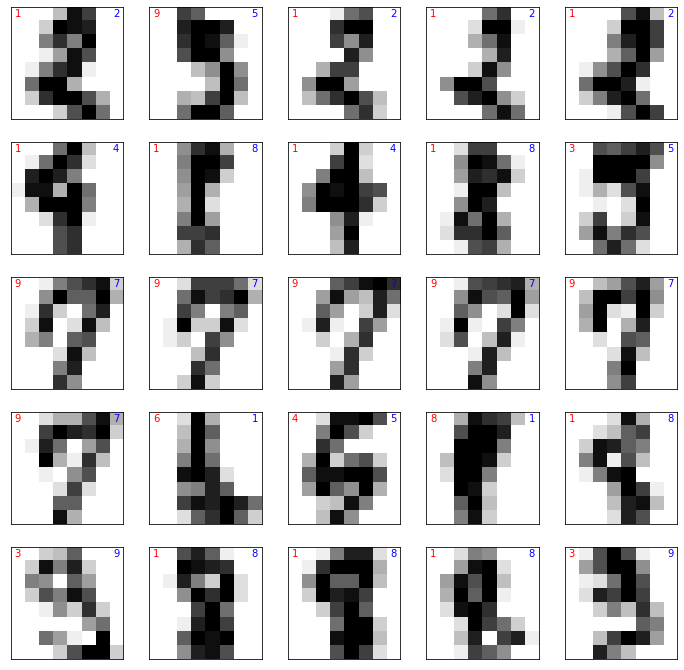

In [37]:
from matplotlib import pyplot as plt

# Mostrar los datos correctos
mask = (Y_pred!=Y_test)
X_aux = X_test[mask]
Y_aux_true = Y_test[mask]
Y_aux_pred = Y_pred[mask]

# We'll plot the first 100 examples, randomly choosen
nx, ny = 5, 5
fig, ax = plt.subplots(nx, ny, figsize=(12,12))
for i in range(nx):
    for j in range(ny):
        index = j+ny*i
        data  = X_aux[index,:].reshape(8,8)
        label_pred = str(int(Y_aux_pred[index]))
        label_true = str(int(Y_aux_true[index]))
        ax[i][j].imshow(data, interpolation='nearest', cmap=plt.get_cmap('gray_r'))
        ax[i][j].text(0, 0, label_pred, horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='red')
        ax[i][j].text(7, 0, label_true, horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='blue')
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)
plt.show()

## 5- Clasificación
#### Análisis del error

Después de la exploración visual de los resultados, queremos obtener el error de predicción real del modelo.

¿Existen dígitos más fáciles o difíciles de clasificar?

In [38]:
# Error global
mask = (Y_pred!=Y_test)
error_prediccion = 100.*sum(mask) / len(mask)
print("Error de predicción total de {0:.1f} %".format(error_prediccion))

for digito in range(0,10):
    mask_digito = Y_test==digito
    Y_test_digito = Y_test[mask_digito] 
    Y_pred_digito = Y_pred[mask_digito]
    mask = Y_test_digito!=Y_pred_digito
    error_prediccion = 100.*sum((Y_pred_digito!=Y_test_digito)) / len(Y_pred_digito)
    print("Error de predicción para digito {0:d} de {1:.1f} %".format(digito, error_prediccion))

Error de predicción total de 2.2 %
Error de predicción para digito 0 de 0.0 %
Error de predicción para digito 1 de 1.1 %
Error de predicción para digito 2 de 2.3 %
Error de predicción para digito 3 de 1.1 %
Error de predicción para digito 4 de 1.7 %
Error de predicción para digito 5 de 1.6 %
Error de predicción para digito 6 de 0.0 %
Error de predicción para digito 7 de 3.9 %
Error de predicción para digito 8 de 6.9 %
Error de predicción para digito 9 de 3.3 %


## 5- Clasificación
#### Análisis del error (cont. de)

El siguiente código muestra el error de clasificación, permitiendo verificar que números son confundibles

In [39]:
from sklearn.metrics import confusion_matrix as cm
cm = cm(Y_test, Y_pred)
print(cm)

[[178   0   0   0   0   0   0   0   0   0]
 [  0 180   0   0   0   0   1   0   1   0]
 [  0   4 173   0   0   0   0   0   0   0]
 [  0   0   0 181   0   0   0   1   1   0]
 [  0   2   0   0 178   0   0   0   1   0]
 [  0   0   0   1   1 179   0   0   0   1]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 172   1   6]
 [  0   9   0   1   0   0   0   0 162   2]
 [  0   0   0   4   0   1   0   0   1 174]]


<Figure size 432x288 with 0 Axes>

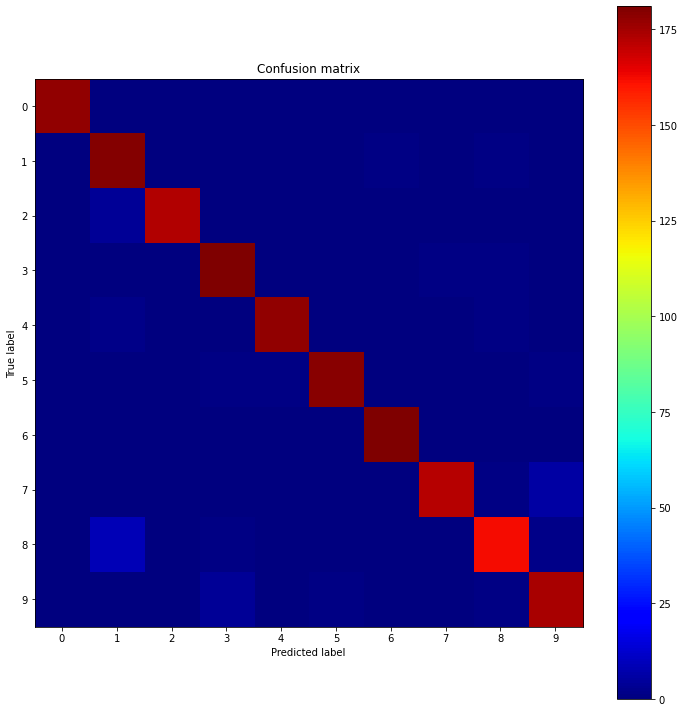

In [40]:
# As in http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.jet):
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return None

# Compute confusion matrix
plt.figure()
plot_confusion_matrix(cm)

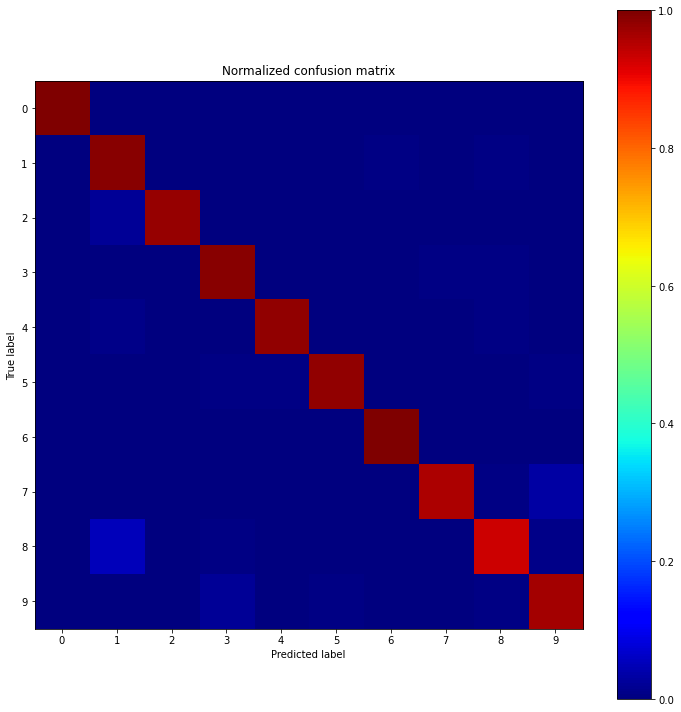

In [41]:
# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

## 5- Clasificación
A partir de lo anterior, vemos observamos que los mayores errores son:
* El 2 puede clasificarse erróneamente como 1 (pero no viceversa).
* El 7 puede clasificarse erróneamente como 9 (pero no viceversa).
* El 8 puede clasificarse erróneamente como 1 (pero no viceversa).
* El 9 puede clasificarse erróneamente como 3 (pero no viceversa).

## 5- Clasificación
#### Preguntas
¿Es éste el mejor método de clasificación? ¿Qué otros métodos pueden utilizarse?

Múltiples familias de algoritmos:
* Logistic Regression
* Naive Bayes
* Decision Trees
* Random Forests
* Support Vector Machines
* Neural Networks
* Etc etc

link: [http://scikit-learn.org/stable/supervised_learning.html](http://scikit-learn.org/stable/supervised_learning.html)

## 5- Conclusión


Sklearn tiene muchos algoritmos implementados y es fácil de usar.

Sin embargo, hay que tener presente GIGO: Garbage In, Garbage Out:
* Exploración y visualización inicial de datos.
* Limpieza de datos
* Utilización del algoritmo requiere conocer su funconamiento para mejor tuneo de parámetros.
* Es bueno y fácil probar más de un algoritmo. 

## 5- Conclusión


Y por último:

* Aplicación de algoritmos de ML es delicado porque requiere (1) conocer bien los datos y (2) entender las limitaciones del algoritmo. 
* Considerar siempre una muestra para entrenamiento y una muestra para testeo: predicción es inútil si no se entrega un margen de error para la predicción.



## 5- Conclusión


# ¡Gracias!